In [1]:
import pybaseball
import pandas as pd
import numpy as np
import bs4
import requests
import matplotlib.pyplot as plt
import unicodedata
import seaborn as sns
import math
import matplotlib.patches as mpatches
from IPython.display import display
pybaseball.cache.enable()
from datetime import datetime

import os
pd.set_option('display.max_columns',None)
os.getcwd()
os.chdir('C:\\Users\\npacchioli\\Desktop\\pyBaseball\\2023\\')
os.getcwd()

directory = 'C:\\Users\\npacchioli\\Desktop\\pyBaseball\\2023\\'

from pybaseball import playerid_lookup
from pybaseball import statcast_pitcher
from pybaseball import statcast_batter
from pybaseball import statcast
from pybaseball import pitching_stats
from pybaseball import cache

In [3]:
import json

# Step 1: Load the JSON data from the file
with open("json_sample.json", "r", encoding="utf-8") as file:
    data = json.load(file)
    
print(team_away)


{'game_status_code': 'F', 'game_status': 'F', 'gamedayType': 'E', 'gameDate': '7/19/2023', 'scoreboard': {'gamePk': 723641, 'linescore': {'note': 'One out when winning run scored.', 'currentInning': 9, 'currentInningOrdinal': '9th', 'inningState': 'Bottom', 'inningHalf': 'Bottom', 'isTopInning': False, 'scheduledInnings': 9, 'innings': [{'num': 1, 'ordinalNum': '1st', 'home': {'runs': 0, 'hits': 1, 'errors': 0, 'leftOnBase': 3}, 'away': {'runs': 3, 'hits': 4, 'errors': 0, 'leftOnBase': 1}}, {'num': 2, 'ordinalNum': '2nd', 'home': {'runs': 3, 'hits': 3, 'errors': 0, 'leftOnBase': 3}, 'away': {'runs': 0, 'hits': 0, 'errors': 0, 'leftOnBase': 0}}, {'num': 3, 'ordinalNum': '3rd', 'home': {'runs': 4, 'hits': 2, 'errors': 0, 'leftOnBase': 1}, 'away': {'runs': 0, 'hits': 1, 'errors': 1, 'leftOnBase': 2}}, {'num': 4, 'ordinalNum': '4th', 'home': {'runs': 1, 'hits': 2, 'errors': 0, 'leftOnBase': 2}, 'away': {'runs': 3, 'hits': 3, 'errors': 0, 'leftOnBase': 1}}, {'num': 5, 'ordinalNum': '5th', '

In [5]:
import json

# Sample JSON data
# Step 1: Load the JSON data from the file
with open("json_sample.json", "r", encoding="utf-8") as file:
    data = json.load(file)


# Get the innings list
innings = data['scoreboard']['linescore']['innings']

# Initialize an empty list to store team_away data
team_away_list = []

# Loop through the innings and extract "team_away" data
for inning_data in innings:
    # Check if "away" team data exists for the inning
    if 'away' in inning_data:
        # Extract the "team_away" data from the inning
        team_away_data = {
            'play_id': inning_data['away']['play_id'],
            'inning': inning_data['num'],
            'ab_number': inning_data['away']['atBatIndex'],
            'cap_index': inning_data['away']['capIndex'],
            'outs': inning_data['away']['outs'],
            'batter': inning_data['away']['batter']['id'],
            'stand': inning_data['away']['batter']['batSide']['code'],
            'batter_name': inning_data['away']['batter']['fullName'],
            'pitcher': inning_data['away']['pitcher']['id'],
            'p_throws': inning_data['away']['pitcher']['pitchHand']['code'],
            'pitcher_name': inning_data['away']['pitcher']['fullName'],
            'team_batting': inning_data['away']['team']['abbreviation'],
            'team_fielding': inning_data['home']['team']['abbreviation'],
            'team_batting_id': inning_data['away']['team']['id'],
            'team_fielding_id': inning_data['home']['team']['id'],
            'result': inning_data['away']['result'],
            'des': inning_data['away']['description'],
            'events': inning_data['away']['events'],
            'contextMetrics': inning_data['away']['contextMetrics'],
            'strikes': inning_data['away']['strikes'],
            'balls': inning_data['away']['balls'],
            'pre_strikes': inning_data['away']['preStrikes'],
            'pre_balls': inning_data['away']['preBalls'],
            'call': inning_data['away']['call'],
            'call_name': inning_data['away']['callName'],
            'pitch_type': inning_data['away']['pitchType']['code'],
            'pitch_name': inning_data['away']['pitchType']['description'],
            'description': inning_data['away']['description'],
            'result_code': inning_data['away']['result'],
            'pitch_call': inning_data['away']['pitchCall'],
            'is_strike_swinging': inning_data['away']['isStrikeSwinging'],
            'balls_and_strikes': f"{inning_data['away']['strikes']}{inning_data['away']['balls']}",
            'start_speed': inning_data['away']['startSpeed'],
            'end_speed': inning_data['away']['endSpeed'],
            'sz_top': inning_data['away']['szTop'],
            'sz_bot': inning_data['away']['szBot'],
            'extension': inning_data['away']['extension'],
            'plateTime': inning_data['away']['plateTime'],
            'zone': inning_data['away']['zone'],
            'spin_rate': inning_data['away']['spinRate'],
            'px': inning_data['away']['pX'],
            'pz': inning_data['away']['pZ'],
            'x0': inning_data['away']['x0'],
            'y0': inning_data['away']['y0'],
            'z0': inning_data['away']['z0'],
            'ax': inning_data['away']['aX'],
            'ay': inning_data['away']['aY'],
            'az': inning_data['away']['aZ'],
            'vx0': inning_data['away']['vX0'],
            'vy0': inning_data['away']['vY0'],
            'vz0': inning_data['away']['vZ0'],
            'pfxX': inning_data['away']['pfxX'],
            'pfxZ': inning_data['away']['pfxZ'],
            'pfxZWithGravity': inning_data['away']['pfxZWithGravity'],
            'pfxZWithGravityNice': inning_data['away']['pfxZWithGravityNice'],
            'pfxZDirection': inning_data['away']['pfxZDirection'],
            'pfxXWithGravity': inning_data['away']['pfxXWithGravity'],
            'pfxXNoAbs': inning_data['away']['pfxXNoAbs'],
            'pfxXDirection': inning_data['away']['pfxXDirection'],
            'breakX': inning_data['away']['breakX'],
            'breakZ': inning_data['away']['breakZ'],
            'inducedBreakZ': inning_data['away']['inducedBreakZ'],
            'is_bip_out': inning_data['away']['isBipOut'],
            'pitch_number': inning_data['away']['pitchNumber'],
            'player_total_pitches': inning_data['away']['playerTotalPitches'],
            'player_total_pitches_pitch_types': inning_data['away']['playerTotalPitchesPitchTypes'],
            'game_total_pitches': inning_data['away']['gameTotalPitches'],
            'rowId': inning_data['away']['rowId'],
            'game_pk': inning_data['away']['gamePk'],
            'player_name': inning_data['away']['team']['name'],
        }

        # Append the "team_away" data to the list
        team_away_list.append(team_away_data)

# Print the "team_away" list
for data in team_away_list:
    print("team_away:", data)


KeyError: 'play_id'

In [9]:
#create all the variables needed to calculate VAA

yO = 50
yf = 17/12
yFin = yO - yf

#first create vy_)

raw23['vy_f'] = -np.sqrt((raw23['vy0']**2) - (2* raw23['ay']*yFin))
raw23['t'] = (raw23['vy_f'] - raw23['vy0']) / raw23['ay']
raw23['vz_f'] = raw23['vz0'] + (raw23['az']*raw23['t'])
raw23['vaa'] = (np.arctan(raw23['vz_f']/raw23['vy_f'])*-1)*(180/np.pi)

raw23['pfx_z'] = raw23['pfx_z']*12
raw23['pfx_x'] = raw23['pfx_x']*12

raw23 = raw23.dropna(subset=['release_spin_rate'])
raw23[['release_spin_rate']] = raw23[['release_spin_rate']].astype('int64')

raw23 = raw23.dropna(subset=['spin_axis'])
raw23[['spin_axis']] = raw23[['spin_axis']].astype('int64')
raw23['as_date'] = pd.to_datetime(raw23['game_date'])
raw23['month'] = raw23['as_date'].dt.strftime('%B')


In [10]:
cano = raw23.loc[raw23['player_name'] == 'Cano, Yennier']

In [12]:
cano['CH'] = np.where(cano['pitch_type'] == 'CH',1,0)
cano['Rolling_CH'] = cano['CH'].rolling(50).mean()
cano['pitchNumber'] = range(len(cano))

C:\Users\npacchioli\AppData\Local\Temp\ipykernel_22772\289651857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cano['CH'] = np.where(cano['pitch_type'] == 'CH',1,0)
C:\Users\npacchioli\AppData\Local\Temp\ipykernel_22772\289651857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cano['Rolling_CH'] = cano['CH'].rolling(50).mean()
C:\Users\npacchioli\AppData\Local\Temp\ipykernel_22772\289651857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [15]:
cano = cano.reset_index()

Text(0.5, 1.0, 'Yennier Cano 50 pitch rolling average of change-ups thrown')

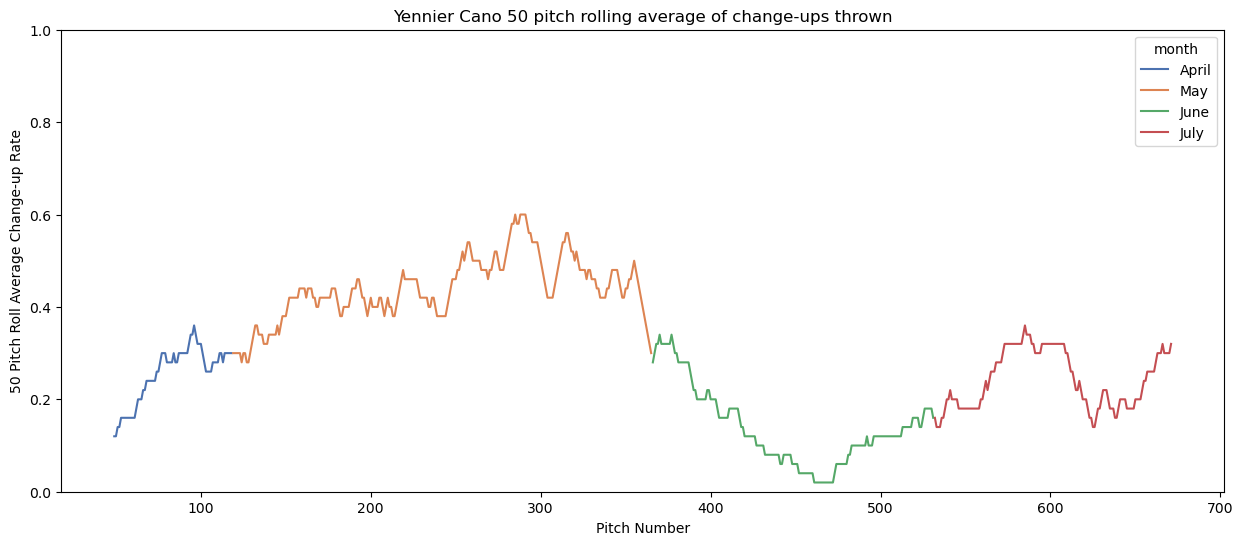

In [23]:
plt.figure(figsize = (15,6))

sns.lineplot(data = cano, x = 'pitchNumber', y = 'Rolling_CH', hue = 'month', palette = 'deep').set(ylim=(0,1))
plt.xlabel('Pitch Number')
plt.ylabel('50 Pitch Roll Average Change-up Rate')
plt.title('Yennier Cano 50 pitch rolling average of change-ups thrown')

In [18]:
#2023 data
t = []

for i in cano['description']:
    if i == 'swinging_strike' or i == 'swinging_strike_blocked' or i == 'foul_tip':
        j = 1
    else:
        j = 0
        
    t.append(j)
    
q = []

for i in cano['description']:
    if i == 'called_strike':
        k = 1
    else:
        k = 0
        
    q.append(k)
    

cano['swstr'] = t
cano['called_str'] = q

cano['csw'] = np.where(cano['swstr'] + cano['called_str'] > 0, 1, 0)

cano['vaa'] = cano['vaa'].astype('float64')
cano['pfx_z'] = cano['pfx_z'].astype('float64')
cano['csw'] = cano['csw'].astype('float64')
cano['release_speed'] = cano['release_speed'].astype('float64')

In [20]:
z = pd.pivot_table(cano,index = 'pitch_type', values = ('release_pos_z','pfx_x','pfx_z','release_speed','swstr'), aggfunc = 'mean')
z = z.reset_index()
z

x = pd.pivot_table(cano,index= 'pitch_type', columns = 'game_date', values = 'description',aggfunc = 'count')
z

,pitch_type,pfx_x,pfx_z,release_pos_z,release_speed,swstr
0,CH,-18.306528,0.692642,5.656425,90.580311,0.233161
1,FF,-16.2,8.880000,4.88,96.400000,0.000000
2,SI,-17.867384,-2.727726,5.302983,95.991198,0.058680
3,SL,4.518261,-0.158261,5.037246,87.718841,0.159420


In [14]:
gray1 = gray.loc[gray['game'] == 'First Game']
grayrest = gray.loc[gray['game'] != 'First Game']

gray1 = gray1.sort_values(by=['pitch_type'])
                          
grayrest = grayrest.sort_values(by=['pitch_type'])

In [15]:
szT = 3.43
szB = 1.64

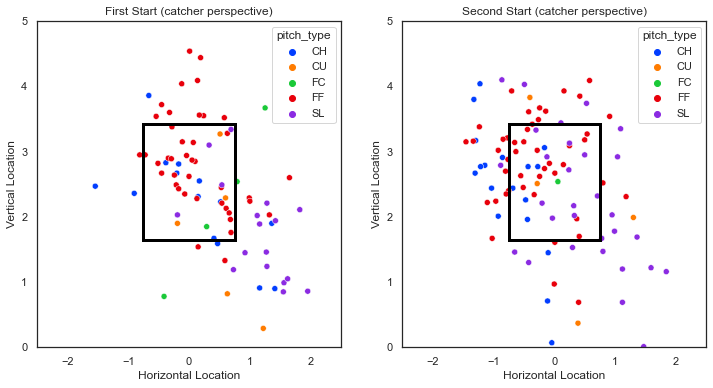

In [17]:
#bradishFastball locations

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.set_theme(style="white", palette=None)

cc = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]


sns.scatterplot(ax = axes[0], x = 'plate_x',y='plate_z', data=gray1, hue='pitch_type',
                      palette= 'bright')
axes[0].set_title('First Start (catcher perspective)')

sns.scatterplot(ax = axes[1], x='plate_x', y = 'plate_z', data=grayrest, hue = 'pitch_type', palette = 'bright')
axes[1].set_title('Second Start (catcher perspective)')

axes[0].set_xlabel('Horizontal Location')
axes[0].set_ylabel('Vertical Location')
axes[1].set_xlabel('Horizontal Location')
axes[1].set_ylabel('Vertical Location')
axes[0].set_xlim(-2.5,2.5)
axes[1].set_xlim(-2.5,2.5)
axes[0].set_ylim(0,5)
axes[1].set_ylim(0,5)

#plt.xlabel('Horizontal Location')
#plt.ylabel('Vertical Location')
plt.xlim((-2.5,2.5))
plt.ylim((0,5))
#plt.title('Kyle Bradish Fastball Location - Catcher Perspective')


left, bottom, width, height = (-.75,szB,1.5,szT-szB)
rect = mpatches.Rectangle((left,bottom),width,height,fill=False,color = 'black',linewidth=3)
rect1 = mpatches.Rectangle((left,bottom),width,height,fill=False,color = 'black',linewidth=3)

axes[0].add_patch(rect)
axes[1].add_patch(rect1)

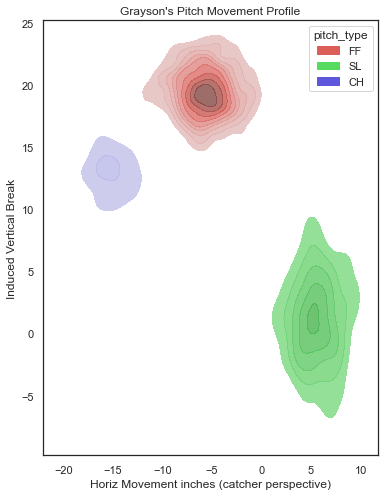

In [43]:
plt.subplots(figsize=(6, 8))
sns.set_theme(style="white", palette=None)

strider = strider.reset_index()

movement = sns.kdeplot(x = 'pfx_x',y='pfx_z', data=strider, hue = 'pitch_type',
                       shade = True, alpha = .8, palette= 'hls', legend = True,
                      levels = 10).set(title='Grayson\'s Pitch Movement Profile',
                                       xlabel='Horiz Movement inches (catcher perspective)',
                                      ylabel='Induced Vertical Break')

#circle2 = plt.Circle((8.5, 2.2), 2.5, color='b', fill=False)
#plt.gca().add_patch(circle2)

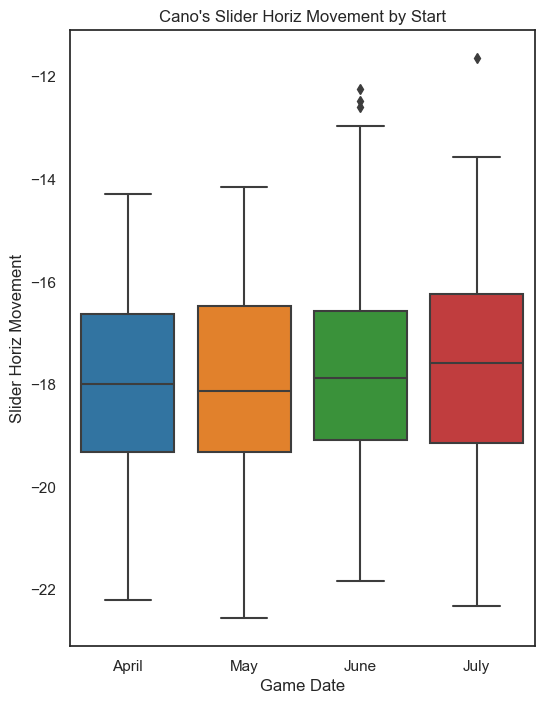

In [43]:
plt.subplots(figsize=(6, 8))
sns.set_theme(style="white", palette=None)

#canoFF = canoFF.reset_index()

movement = sns.boxplot(x = 'month',y='pfx_x', data=canoSI).set(title='Cano\'s Slider Horiz Movement by Start',
                                       xlabel='Game Date',
                                      ylabel='Slider Horiz Movement')

#circle2 = plt.Circle((8.5, 2.2), 2.5, color='b', fill=False)
#plt.gca().add_patch(circle2)

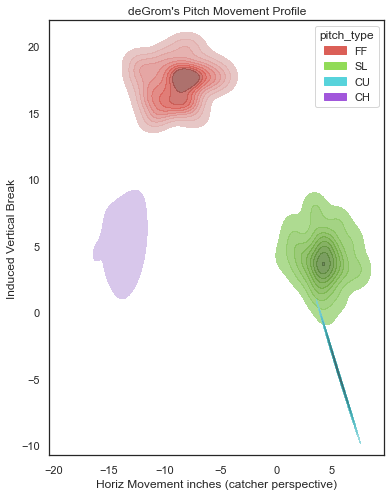

In [103]:
plt.subplots(figsize=(6, 8))
sns.set_theme(style="white", palette=None)



movement = sns.kdeplot(x = 'pfx_x',y='pfx_z', data=degr, hue = 'pitch_type',
                       shade = True, alpha = .8, palette= 'hls', legend = True,
                      levels = 10).set(title='deGrom\'s Pitch Movement Profile',
                                       xlabel='Horiz Movement inches (catcher perspective)',
                                      ylabel='Induced Vertical Break')

#circle2 = plt.Circle((8.5, 2.2), 2.5, color='b', fill=False)
#plt.gca().add_patch(circle2)

In [60]:
grayFast = gray.loc[gray['pitch_type'] == 'FF']

In [10]:
x = pd.pivot_table(gray, index = 'pitch_type', columns = 'game_date', values = ('swstr','csw'))
x = x.reset_index()
x

#y = pd.pivot_table(gray, index = 'pitch_type', values = ('description'), aggfunc = 'count')
#y = y.reset_index()

#x = pd.merge(x,on = 'pitch_type',how = 'left')


pitch_type        csw                                              \
game_date        NaT 2023-04-05 2023-04-11 2023-04-16 2023-04-23 2023-04-29   
0                 CH   0.071429   0.111111   0.444444   0.294118   0.434783   
1                 CU   0.400000   0.000000   0.000000   0.416667   0.500000   
2                 FC   0.000000   0.000000   0.437500   0.200000   0.300000   
3                 FF   0.390244   0.326087   0.243243   0.243902   0.243902   
4                 SL   0.210526   0.322581   0.166667   0.294118   0.428571   

                                                swstr                        \
game_date 2023-05-04 2023-05-09 2023-05-15 2023-04-05 2023-04-11 2023-04-16   
0           0.157895   0.269231   0.157895   0.071429   0.111111   0.296296   
1           0.250000   0.277778   0.500000   0.200000   0.000000   0.000000   
2           0.235294   0.350000   0.285714   0.000000   0.000000   0.000000   
3           0.312500   0.225806   0.187500   0.195122   0.152174   0.081081   
4           0.000000   0.166667   0.266667   0.210526   0.193548   0.083333   

                                                                  
game_date 2023-04-23 2023-04-29 2023-05-04 2023-05-09 2023-05-15  
0           0.117647   0.347826   0.000000   0.153846   0.052632  
1           0.000000   0.200000   0.000000   0.000000   0.333333  
2           0.200000   0.000000   0.117647   0.050000   0.000000  
3           0.121951   0.073171   0.125000   0.096774   0.125000  
4           0.058824   0.000000   0.000000   0.166667   0.066667

In [117]:
pd.pivot_table(gray, index = 'pitch_type',columns = 'when',values = 'csw')

when,First Inning,Rest of Game
pitch_type,,
CH,0.000000,0.125000
CU,1.000000,0.250000
FC,0.000000,0.000000
FF,0.214286,0.481481
SL,0.125000,0.272727


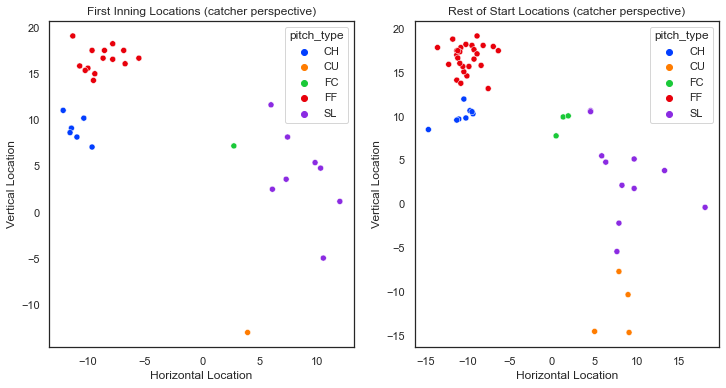

In [121]:
#bradishFastball locations

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.set_theme(style="white", palette=None)

cc = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]


sns.scatterplot(ax = axes[0], x = 'pfx_x',y='pfx_z', data=gray1, hue='pitch_type',
                      palette= 'bright')
axes[0].set_title('First Inning Locations (catcher perspective)')

sns.scatterplot(ax = axes[1], x='pfx_x', y = 'pfx_z', data=grayrest, hue = 'pitch_type', palette = 'bright')
axes[1].set_title('Rest of Start Locations (catcher perspective)')

axes[0].set_xlabel('Horizontal Location')
axes[0].set_ylabel('Vertical Location')
axes[1].set_xlabel('Horizontal Location')
axes[1].set_ylabel('Vertical Location')
#axes[0].set_xlim(-2.5,2.5)
#axes[1].set_xlim(-2.5,2.5)
#axes[0].set_ylim(0,5)
#axes[1].set_ylim(0,5)

#plt.xlabel('Horizontal Location')
#plt.ylabel('Vertical Location')
#plt.xlim((-2.5,2.5))
#plt.ylim((0,5))
#plt.title('Kyle Bradish Fastball Location - Catcher Perspective')


left, bottom, width, height = (-.75,szB,1.5,szT-szB)
rect = mpatches.Rectangle((left,bottom),width,height,fill=False,color = 'black',linewidth=3)
rect1 = mpatches.Rectangle((left,bottom),width,height,fill=False,color = 'black',linewidth=3)

#axes[0].add_patch(rect)
#axes[1].add_patch(rect1)

In [36]:
pd.pivot_table(gray,index = 'description',columns = 'game', values = 'pitch_type', aggfunc = 'count')

game,First Game,Second Game
description,,
ball,28.0,31.0
blocked_ball,2.0,3.0
called_strike,9.0,12.0
foul,16.0,25.0
foul_tip,2.0,3.0
hit_into_play,14.0,13.0
swinging_strike,11.0,12.0
swinging_strike_blocked,1.0,NaN


In [41]:
1-34/99

0.6565656565656566

In [39]:
1-30/81

0.6296296296296297